## Dependencies

In [66]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

## Data Loading

In [2]:
def load_variants_and_summaries(folder: os.PathLike) -> pd.DataFrame:
    dfs = []
    for root, _, filenames in os.walk(folder):
        for filename in filenames:
            if filename.endswith('.evo'):
                filepath = os.path.join(root, filename)
                variant = os.path.dirname(filepath)[len(folder)+1:]
                df = pd.read_csv(filepath, sep='\t')
                df = df.set_index('generation_id')
                dfs.append((variant, df))
    return dict(dfs)

In [3]:
summary_per_variant = load_variants_and_summaries(folder='../evolution')

In [4]:
[(k, len(v)) for (k, v) in summary_per_variant.items()]

[('tests', 9)]

## Analysis

## Probability of Leap

### Fitness over Generations

TypeError: annotate() missing 1 required positional argument: 'text'

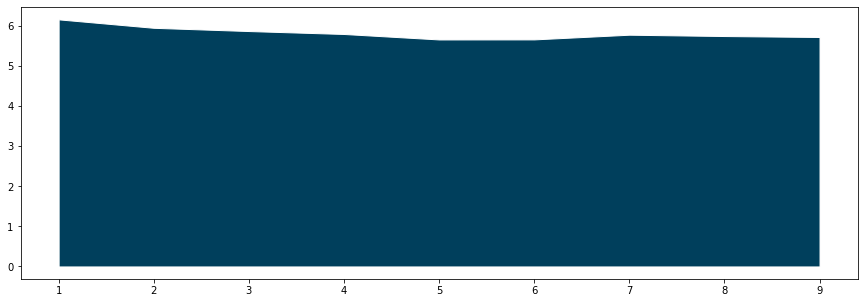

In [122]:
def plot_fitness_over_generations(df: pd.DataFrame):
    def annotated_area(index: pd.Series, values: pd.Series, color: str, label: str):
        ax.fill_between(index, values, color=color, edgecolor='#fff', label='entropy (dna/pool)')
        for i, v in enumerate(values):
            ax.annotate(str(v), xy=(i,v), xytext=(-7,7), textcoords='offset points')

    fig, ax = plt.subplots(figsize=(15, 5))
    annotated_area(df.index, df.dna_pool_entropy, color='#003f5c', label='entropy (dna/pool)')
    annotated_area(df.index, df.fitness_highest, color='#58508d', label='fitness (highest)')
    annotated_area(df.index, df.fitness_p95, color='#bc5090', label='fitness (p95)')
    annotated_area(df.index, df.fitness_mean, color='#ff636144', label='fitness (mean)')
    ax.set_facecolor("#eee")
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4)
    ax.grid(True)
    ax.set_xlabel('generation')
    ax.set_ylabel('fitness score (lines) & entropy score (bar)')
    fig.subplots_adjust(bottom=0.25)

plot_fitness_over_generations(df=summary_per_variant.get('tests'))